<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Statistics Fundamentals

_Instructor:_ Alexander Egorenkov (DC), Amy Roberts (NYC) Tim Book, General Assembly DC_

---

<a id="learning-objectives"></a>
## Learning Objectives
- **Linear algebra:** Dot products, matrix multiplications, and vector norms by hand and using NumPy.
- **Summary statistics:** Using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.
- **Discover trends:** Using basic summary statistics and viz.
- **Bias/variance tradeoff:** Describe the bias and variance of statistical estimators.
- **Identify a normal distribution** within a data set using summary statistics and data visualizations.

### Lesson Guide
- [Linear Algebra Review](#linear-algebra-review)
    - [Scalars, Vectors, and Matrices](#scalars-vectors-and-matrices)
	- [Basic Matrix Algebra](#basic-matrix-algebra)
	- [Dot Product](#dot-product)
	- [Matrix Multiplication](#matrix-multiplication)
	- [Vector Norm](#vector-norm)
- [Linear Algebra Applications to Machine Learning](#linear-algebra-applications-to-machine-learning)
    - [Code-Along: Examining the Cars Data Set](#codealong-examining-the-cars-dataset)
- [Descriptive Statistics Fundamentals](#descriptive-statistics-fundamentals)
	- [Measures of Central Tendency](#measures-of-central-tendency)
	- [Math Review](#math-review)
	- [Measures of Dispersion: Standard Deviation and Variance](#measures-of-dispersion-standard-deviation-and-variance)
- [Our First Model](#our-first-model)
- [A Short Introduction to Model Bias and Variance](#a-short-introduction-to-model-bias-and-variance)
- [Correlation and Association](#correlation-and-association)
- [The Normal Distribution](#the-normal-distribution)
	- [What is the Normal Distribution?](#what-is-the-normal-distribution)
	- [Skewness](#skewness)
	- [Kurtosis](#kurtosis)
- [Determining the Distribution of Your Data](#determining-the-distribution-of-your-data)
- [Lesson Review](#topic-review)
- [Extra Lab - Feature Reduction](#lab-stats-dim)

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics # Did you catch this is new? 
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook.
%matplotlib inline

<a id="where-are-we-in-the-data-science-workflow"></a>
## Where Are We in the Data Science Workflow?

![Data Science Workflow](./assets/images/data-science-workflow.png)

<a id="linear-algebra-review"></a>
## Linear Algebra Review
---
**Objective:** Compute dot products, matrix multiplications, and vector norms by hand and using NumPy.

<a id="why-linear-algebra"></a>
### Why Use Linear Algebra in Data Science?

- Linear models are efficient and well understood. They can often closely approximate nonlinear solutions, and they scale to high dimensions without difficulty.


- **Linear models are all based on linear algebra**, so we should know that too.


- Furthermore, even the complicated models rely on the basic models, which in turn rely heavily on linear algebra.


- Although we do not have time in this course to comprehensively discuss linear algebra, you may want to take time to understand it better.

<a id="scalars-vectors-and-matrices"></a>
### Scalars, Vectors, and Matrices

<img src="assets/images/scalars-vectors-matrices.png">


A **scalar** is a single number. 
- Symbols that are lowercase single letters refer to scalars. For example, the symbols $a$ and $v$ are scalars that might refer to arbitrary numbers such as $5.328$ or $7$. 

- An example scalar would be: $a$

- It's usually easy to consider vectors as either a $1 \times n$ or $n \times 1$ "row" or "column" vector, where convenient.
<br>
<br>

A **vector** is an ordered sequence of numbers, **like a list**. 
- Unlike a Python list, a vector can only be numeric. It can be a row or a column.
- Here, symbols that are lowercase single letters with an arrow — such as $\vec{u}$ — refer to vectors. An example vector would be:

$$\vec{u} = \left[ \begin{array}{c}
1&3&7
\end{array} \right]$$

In [9]:
# Create a vector using np.array.
u = np.array([1, 3, 7])
print(u)
print(np.sum(u))
print(u[2])

[1 3 7]
11
7


An $m$ x $n$ **matrix** is a rectangular array of numbers with $m$ rows and $n$ columns. Each number in the matrix is an entry. Entries can be denoted $a_{ij}$, where $i$ denotes the row number and $j$ denotes the column number. Note that, because each entry $a_{ij}$ is a lowercase single letter, a matrix is an array of scalars:

$$\mathbf{A}= \left[ \begin{array}{c}
a_{11} & a_{12} & \cdots & a_{1n}  \\
a_{21} & a_{22} & \cdots & a_{2n}  \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{array} \right]$$

Matrices are referred to using bold uppercase letters, such as $\mathbf{A}$. A bold font face is used to distinguish matrices from sets. (Sometimes, not always).

In [10]:
# Create a matrix using np.array.
m = np.array([[1, 3, 7], [4, 6, 3], [2, 5, 6]])
m

array([[1, 3, 7],
       [4, 6, 3],
       [2, 5, 6]])

Note that in Python, a matrix is just a list of lists converted to numpy arrays(or a group of vectors)! **In fact, a vector is also matrix!**

#### Arrays are More Efficient than Pandas Series

In [13]:
s = pd.Series(u)
print(s) 

0    1
1    3
2    7
dtype: int32


In [14]:
%timeit -n 10000 u[1]

127 ns ± 27.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%timeit -n 10000 s[1]

11.1 µs ± 1.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<a id="basic-matrix-algebra"></a>
### Basic Matrix Algebra


#### Addition and Subtraction
Vector **addition** is straightforward. If two vectors are of equal dimensions (The vectors are shown here as column vectors for convenience only):

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right],  \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

In [23]:
v = np.array([1, 3, 7])
w = np.array([1, 0, 1])

$\vec{v} + \vec{w} =
\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] + \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right] = 
\left[ \begin{array}{c}
1+1 \\
3+0 \\
7+1
\end{array} \right] = 
\left[ \begin{array}{c}
2 \\
3 \\
8
\end{array} \right]
$

(Subtraction is similar.)

In [3]:
# Add the vectors together with +.
v+w

In [ ]:
# now using numpy (np.sum)
np.sum([v,w], axis=0)

**Classroom Question**: What happens when **axis=1**?

**Classroom Exercise**:
Subtract the vectors.  Write it out by hand and then allow Python to do the work.

In [ ]:
# Subtract the vectors using the similar methods that were used for addition
# the - operator
#np.subtract([v,w], axis=0)
#help(np.subtract)
v-w

#### Scalar Multiplication
We scale a vector with **scalar multiplication**, multiplying a vector by a scalar (single quantity):

$ 2 \cdot \vec{v} = 2\left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \cdot 1 \\
2 \cdot 3 \\
2 \cdot 7
\end{array} \right] = 
 \left[ \begin{array}{c}
2 \\
6 \\
14
\end{array} \right]$ 

In [4]:
# Multiply v by 2.
2*v

In [ ]:
# Multiply w and v
W*V

<a id="dot-product"></a>
### Dot Product
The **dot product** of two _n_-dimensional vectors is:

$ \vec{v} \cdot \vec{w} =\sum _{i=1}^{n}v_{i}w_{i}=v_{1}w_{1}+v_{2}w_{2}+\cdots +v_{n}w_{n} $

So, if:

$\vec{v} = \left[ \begin{array}{c}
1 \\
3 \\
7
\end{array} \right], \vec{w} = \left[ \begin{array}{c}
1 \\
0 \\
1
\end{array} \right]$

$ \vec{v} \cdot \vec{w} = 1 \cdot 1 + 3 \cdot 0 + 7 \cdot 1 = 8 $

_Tim Note:_ When considering vectors as "column vectors", you will often see a dot product written as $\mathbf{v}^T\mathbf{w}$. In more pure-math based literature, you might even see $\langle v, w \rangle$.

In [24]:
# Calculate the dot product of v and w using np.dot.
np.dot(v,w)

8

In [25]:
# try the .dot() method on v to do the same
# How could you have found this option?
v.dot(w)

8

<a id="matrix-multiplication"></a>
### Matrix Multiplication
**Matrix multiplication**, $\mathbf{AB}$, is valid when the left matrix has the same number of columns as the right matrix has rows. Each entry is the dot product of corresponding row and column vectors.

![](assets/images/matrix-multiply-a.gif)
(Image: mathisfun.com)


![](assets/images/matrix-multiplication-song.png)

The dot product illustrated above is: $1 \cdot 7 + 2 \cdot 9 + 3 \cdot 11 = 58$. **Can you compute the rest of the dot products by hand?**

If the product is the $2$ x $2$ matrix $\mathbf{C}$, then:

+ Matrix entry $c_{12}$ (its FIRST row and SECOND column) is the dot product of the FIRST row of $\mathbf{A}$ and the SECOND column of $\mathbf{B}$.

+ Matrix entry $c_{21}$ (its SECOND row and FIRST column) is the dot product of the SECOND row of $\mathbf{A}$ and the FIRST column of $\mathbf{B}$.

**Lets compute the example above, with the $2$ x $3$ matrix multiplied by $3$ x $2$ matrix, which results in a $2$ x $2$ matrix. Can you see why?**

In [ ]:
# Multiply the two above matrices

#Make them first
A = np.array([[1, 2, 3], [4, 5, 6]])

B = np.array([[7, 8],[9,10], [11, 12]])

#now multiply!

C= np.dot(A,B)

In [20]:
# Subset C to show the value in the first row and second column (upper right value!)
print(C)
C[0][1]

<a id="n-dimensional-space"></a>
### N-Dimensional Space

We often refer to vectors as elements of an $n$-dimensional space. The symbol $\mathbb{R}$ refers to the set of all real numbers (written in uppercase "blackboard bold" font). Because this contains all reals, $3$ and $\pi$ are **contained in** $\mathbb{R}$. We often write this symbolically as $3 \in \mathbb{R}$ and $\pi \in \mathbb{R}$.

To get the set of all pairs of real numbers, we would essentially take the product of this set with itself (called the Cartesian product) — $\mathbb{R}$ x $\mathbb{R}$, abbreviated as $\mathbb{R}^2$. This set — $\mathbb{R}^2$ — contains all pairs of real numbers, so $(1, 3)$ is **contained in** this set. We write this symbolically as $(1, 3) \in \mathbb{R}^2$.

+ In 2-D space ($\mathbb{R}^2$), a point is uniquely referred to using two coordinates: $(1, 3) \in \mathbb{R}^2$.
+ In 3-D space ($\mathbb{R}^3$), a point is uniquely referred to using three coordinates: $(8, 2, -3) \in \mathbb{R}^3$.
+ In $n$-dimensional space ($\mathbb{R}^n$), a point is uniquely referred to using $n$ coordinates.

Note that these coordinates of course are isomorphic to our vectors! After all, coordinates are ordered sequences of numbers, just as we define vectors to be ordered sequences of numbers. So, especially in machine learning, we often visualize vectors of length $n$ as points in $n$-dimensional space.

<a id="vector-norm"></a>
### Vector Norm 

The **magnitude** of a vector, $\vec{v} \in \mathbb{R}^{n}$, can be interpreted as its length in $n$-dimensional space. Therefore it is calculable via the Euclidean distance from the origin:

$\vec{v} = \left[ \begin{array}{c}
v_{1} \\
v_{2} \\
\vdots \\
v_{n}
\end{array} \right]$

then $\| \vec{v} \| = \sqrt{v_{1}^{2} + v_{2}^{2} + ... + v_{n}^{2}} = \sqrt{\vec{v}^T\vec{v}}$

E.g. if $\vec{v} = 
\left[ \begin{array}{c}
3 \\
4
\end{array} \right]$, then $\| \vec{v} \| = \sqrt{3^{2} + 4^{2}} = 5$

This is also called the vector **norm**. You will often see this used in machine learning.

In [5]:
# Calculate the norm of the vector x with np.linalg.norm.


<a id="linear-algebra-applications-to-machine-learning"></a>
## Linear Algebra Applications to Machine Learning
---

Linear Algebra will give you better intuition for machine learning algorithms and see them beyond "black boxes".  Models have parameters, or hyperparameters that you can tune, and understanding the inner workings can help you refine your models.

You can also code algorithms from scratch, if you choose to become more advanced.

<a id="distance-between-actual-values-and-predicted-values"></a>
### Distance Between Actual Values and Predicted Values
We often need to know the difference between predicted values and actual values. 

![](assets/images/vector-norms.png)


#### L² Norm (Least Squares)
Most commonly, we use the **L²** norm, which is the sum of the squared values.  In 2-D space, we compute this as:
$$ L^2 norm = \|\vec{actual} - \vec{predicted} \| = \sqrt{(actual_1 - predicted_1)^2 + (actual_2 - predicted_2)^2 ... + (actual_n - predicted_n)^2}$$

Note that this is just the **straight-line distance** or **as-the-crow-flies distance** between the actual point and the predicted point.


#### L¹ Norm (Least Absolute Deviations)
Another less used method is the **L¹** norm, aka **taxicab distance** because it describes the number of blocks to travel to reach the destination.

$$ L^1 norm = \|\vec{actual} - \vec{predicted} \| = |(actual_1 - predicted_1)| + |(actual_2 - predicted_2)| ... + |(actual_n - predicted_n)| $$


![](assets/images/L1-vs-L2-properties1.png)
<br>
<br>


### Mean Absolute Error
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. All individual differences have equal weight.

$$MAE = \frac{1} {n} \| \hat{y}(\mathbf{X}) - \vec{y} \|$$


<a id="mean-squared-error"></a>
### Mean Squared Error
Another method for measuring distance, or error between predicted and actual, is the mean of the squared errors.  **This is often used to measure the quality of regression models.** Where $\hat{y}(\mathbf{X})$ is a vector of predicted values (a function of the data matrix $\mathbf{X}$) and $\vec{y}$ is the actual values:

$$MSE = \frac{1} {n} ( \hat{y}(\mathbf{X}) - \vec{y} )^2$$



### Root Mean Squared Error
Another similar method for measuring distance, or error between predicted and actual, is the square root of the mean of the squared errors.  **This is another common method to measure the quality of regression models.** Where $\hat{y}(\mathbf{X})$ is a vector of predicted values (a function of the data matrix $\mathbf{X}$) and $\vec{y}$ is the actual values:

$$RMSE = \sqrt{\frac{1} {n} ( \hat{y}(\mathbf{X}) - \vec{y} )^2}$$


Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful than MAE and MSE when large errors are not desired.

<a id="least-squares"></a>
### Least Squares
Regression models use least squares to optimize the fit of the model, and are based on the following form:

$$\min \| \hat{y}(\mathbf{X}) - \vec{y} \|^2$$

The goal is to minimize the distance between model predictions and actual data.

Let's see this in [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html).


<a id="codealong-examining-the-cars-dataset"></a>
### Follow-Along: Examining the Cars dataset
---

This is a follow-along vs a code-along for the sake of time so we can get back to statistics

Read in the Motor Trend Cars data. 

**Data Source**: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html

**Description**
The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

**Format**
A data frame with 32 observations on 11 (numeric) variables.

- **mpg**	Miles/(US) gallon
- **cyl**	Number of cylinders
- **disp**	Displacement (cu.in.)
- **hp**	Gross horsepower
- **drat**	Rear axle ratio
- **wt**	Weight (1000 lbs)
- **qsec**	1/4 mile time
- **vs**	Engine (0 = V-shaped, 1 = straight)
- **am**	Transmission (0 = automatic, 1 = manual)
- **gear**	Number of forward gears
- **carb**	Number of carburetors

In [22]:
mtcars = pd.read_csv('data/mtcars.csv')

Imagine we were trying to predict mpg of a car.  Lets create 2 random columns, *predicted mpg* and *predicted_mpg_2* , that we will assume were predicted with 2 different machine learning models.

In [ ]:
mtcars.head()

#### Create synthetic values for each prediction (demo purpose)

In [3]:
np.random.seed(0)
mtcars['predicted_mpg'] = np.random.randint(15, 30, mtcars.shape[0])
mtcars['predicted_mpg_2'] = np.random.randint(18, 26, mtcars.shape[0])

In [ ]:
mtcars.head(10)

#### Print out the dimensions of the DataFrame using the `.shape` attribute:

In [14]:
# Preview data dimensions.
mtcars.shape

#### Print out the data types of the columns using the `.dtypes` attribute:

In [15]:
# What are the column data types?
mtcars.dtypes

#### Pull up descriptive statistics for each variable using the built-in `.describe()` function:

In [ ]:
# Pull up descriptive statistics for mpg, predicted_mpg and predicted_mpg_2
mtcars[['mpg','predicted_mpg','predicted_mpg_2']].describe()

#### Calculate Euclidean distance between the predicted columns and actual column

In [4]:
#L2 Norm aka Euclidean Distance aka Straight-Line Distance
print('Model 1 L2 Norm:', np.linalg.norm(mtcars.mpg-mtcars.predicted_mpg))

print('Model 2 L2 Norm:', np.linalg.norm(mtcars.mpg-mtcars.predicted_mpg_2))

### Exercises:

#### 1. Going the Distance

Calculate the L1 Norm for each prediction.  Look at the help for np.linalg.norm, and specifically the **ord** parameter. (hint:L**1**)


In [ ]:
print('Model 1 L1 Norm:', np.linalg.norm(mtcars.mpg-mtcars.predicted_mpg, ord=1))

In [ ]:
print('Model 2 L1 Norm:', np.linalg.norm(mtcars.mpg-mtcars.predicted_mpg_2, ord=1))

#### 2. Calculate the MAE using numpy.  (hint: nest np.abs into np.mean and np.abs)

In [18]:
print('Model 1 MAE:', np.mean(np.abs(mtcars.mpg-mtcars.predicted_mpg)))
print('Model 2 MAE:', np.mean(np.abs(mtcars.mpg-mtcars.predicted_mpg_2)))

#### 3. Calculate the MSE using numpy.  (hint: use np.mean and np.square)

In [19]:
print('Model 1 MSE:', np.mean(np.square(mtcars.mpg-mtcars.predicted_mpg)))
print('Model 2 MSE:', np.mean(np.square(mtcars.mpg-mtcars.predicted_mpg_2)))

#### 4. Calculate the RMSE using numpy.  (hint: use the MSE calculation and take the square root)

In [ ]:
print('Model 1 MSE:', np.sqrt(np.mean(np.square(mtcars.mpg-mtcars.predicted_mpg))))
print('Model 2 MSE:', np.sqrt(np.mean(np.square(mtcars.mpg-mtcars.predicted_mpg_2))))

#### 5. Based on these metrics, which of these 2 simple models is better at explaining the behavior?

<a id="descriptive-statistics-fundamentals"></a>
## Statistics Fundamentals
---

- **Objective:** Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.

### Statistics

Statistics is essentially the study of distributions. We leverage distributions to tie the frequency of a value to the actual value observed. Our goal is to understand how to pull meaning out of distributions of various datasets to arrive at the formal definition of statistics


>**Statistics** is a branch of mathematics dealing with the collection, analysis, interpretation, presentation, and organization of data.

That said there is ALOT of nuance within statistics. For this class you won't need to intimately understand statistics - but as you progress through your Data Science career it will increase in frequency. While the *litmus test* is a Data Scientist is better at statistics than a programmer you'll be able to go much further with an indepth review.

Statistical References:
* A great start [Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)
* [Bayesian Data Analysis, by Andrew Gelman](http://www.stat.columbia.edu/~gelman/book/)
* [Machine Learning: a Probabilistic Perspective](https://www.cs.ubc.ca/~murphyk/MLbook/)
* [Pattern Recognition and Machine Learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
* And of course my personal [favorite](http://mtvernon.wsu.edu/wp-content/uploads/2016/12/Statistics_for_Terrified_Biologists.pdf)


### A Quick Review of Notation

The sum of a constant, $k$, $n$ times:
$$\sum_{i=1}^nk$$

In [20]:
# k + k + k + k + ... + k
# For i from 1 up to and including n, add k to the sum.

> It is often helpful to think of these sums as `for` loops. For example, the equation can be compactly computed like so:

```
total = 0

# For i from 1 up to and including n, add k to the sum.
for i in range(1, n+1):
    total += k
```

> Or, even more succinctly (using a generator comprehension):

```
total = sum(k for i in range(1, n+1))
```

In [ ]:
k=5
n=10
total=0
for i in range(1, n+1):
    total += k
    print(total)

The sum of all numbers from 1 up to and including $n$:
$$\sum_{i=1}^ni$$

In [21]:
# 1 + 2 + 3 + ... + n

> ```
total = sum(i for i in range(1, n+1))
```

In [ ]:
n=10
total=0
total = sum(i for i in range(1, n+1))
print(total)

The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [22]:
# x_1 + x_2 + x_3 + ... + x_n

> ```
total = sum(xi in x)      # or just sum(x)
```

#### Code-Along

_Optional: Write down the mathematical notation for the following questions:_

In [24]:
# Compute the sum of seven 4s using base Python.
sum([4, 4, 4, 4, 4, 4, 4])

$$\sum_{i=1}^{7}{4}$$

In [25]:
# Compute the sum of seven 4s using NumPy
print(np.sum([4, 4, 4, 4, 4, 4, 4]))
print(np.multiply(4,7))

$$\sum_{i=1}^{7}{4}$$

In [26]:
# Compute the sum of 1 through 10 using base Python.
sum(i+1 for i in range(10))

$$\sum_{i=0}^{10}{x_i}$$

In [28]:
# Using the titanic.fare column, compute the total fare paid by passengers.
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

In [ ]:
#Answer here
print(np.sum(titanic.fare))

<a id="measures-of-central-tendency"></a>
### Measures of Central Tendency

- Mean
- Median
- Mode

#### Mean
The mean is defined as:
$$\bar{x} =\frac 1n\sum_{i=1}^nx_i$$

It is determined by summing all data points in a population and then dividing the total by the number of points. The resulting number is known as the mean or the average.

Be careful — the mean can be highly affected by outliers. For example, the mean of a very large number and some small numbers will be much larger than the "typical" small numbers. Earlier, we saw that the mean squared error (MSE) was used to optimize linear regression. Because this mean is highly affected by outliers, the resulting linear regression model is, too.

We say the mean is **sensitive** to outliers.

#### Median
The median refers to the midpoint in a series of numbers. Notice that the median is not affected by outliers, so it more so represents the "typical" value in a set.

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

Although the median has many useful properties, the mean is easier to use in optimization algorithms. The median is more often used in analysis than in machine learning algorithms.

The median isn't really affected by a few outliers. We say the median is **resistant** to outliers.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

#### Code-Along

In [26]:
# Let's bring the titanic dataset into memory
titanic = pd.read_csv('data/titanic.csv')

#### Find the mean of the `titanic.fare` series using base Python:

In [ ]:
sum(titanic.fare)/len(titanic.fare)

#### Find the mean of the `titanic.fare series` using NumPy:

In [ ]:
np.mean(titanic.fare)

#### Find the mean of the `titanic.fare` series using Pandas:

In [ ]:
titanic.fare.mean()

#### What was the median fare paid (using Pandas)?

In [ ]:
titanic.fare.median()

#### The mean and median are not the same, what does this tell you about the fares?


In [ ]:
#It's not a normal distribution

#### Use Pandas to find the most common fare paid on the Titanic:

In [27]:
titanic.fare.mode()


0    8.05
dtype: float64

#### Notice that this returns a series instead of a single number, why?

In [36]:
8.05 is the most frequent observation but it has to calculate all of those first. 0 is the index of the count

pandas.core.series.Series

#### Use the built-in  `.value_counts()` function to count the values of each type in the `pclass` column:

In [37]:
titanic.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

#### Pull up descriptive statistics for each variable using the built-in `.describe()` function:

In [38]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Diagnosing Data Problems

- Whenever you get a new data set, the fastest way to find mistakes and inconsistencies is to look at the **descriptive statistics**.
  - If anything looks too high or too low relative to your experience, there may be issues with the data collection.
- Your data may contain a lot of **missing values** and may need to be cleaned meticulously before they can be combined with other data.
  - You can take a quick average or moving average to smooth out the data and combine that to preview your results before you embark on your much longer data-cleaning journey.
  - Sometimes filling in missing values with their means or medians will be the best solution for dealing with missing data. Other times, you may want to drop the offending rows or do real imputation.

<a id="math-review"></a>
### Math Review

#### How Do We Measure Distance?

One method is to take the difference between two points:

$$X_2 - X_1$$

However, this can be inconvenient because of negative numbers.

We often use the following square root trick to deal with negative numbers. Note this is equivalent to the absolute value (if the points are 1-D):

$$\sqrt{(X_2-X_1)^2} = | X_2 - X_1 |$$

#### What About Distance in Multiple Dimensions?

We can turn to the Pythagorean theorem.

$$a^2 + b^2 = c^2$$

To find the distance along a diagonal, it is sufficient to measure one dimension at a time:

$$\sqrt{a^2 + b^2} = c$$

More generally, we can write this as the norm (You'll see this in machine learning papers):

$$\|X\|_2 = \sqrt{\sum{x_i^2}} = c$$

What if we want to work with points rather than distances? For points $\vec{x}: (x_1, x_1)$ and $\vec{y}: (y_1, y_2)$ we can write:

$$\sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2} = c$$
or
$$\sqrt{\sum{(x_i - y_i)^2}} = c$$
or
$$\| \vec{x} - \vec{y} \| = c$$

> You may be more familiar with defining points as $(x, y)$ rather than $(x_1, x_2)$. However, in machine learning it is much more convenient to define each coordinate using the same base letter with a different subscript. This allows us to easily represent a 100-dimensional point, e.g., $(x_1, x_2, ..., x_{100})$. If we use the grade school method, we would soon run out of letters!

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
### Measures of Dispersion: Standard Deviation and Variance

Standard deviation (SD, $σ$ for population standard deviation, or $s$ for sample standard deviation) is a measure that is used to quantify the amount of variation or dispersion from the mean of a set of data values. A low standard deviation means that most of the numbers are close to the average. A high standard deviation means that the numbers are spread out.

Standard deviation is the square root of variance:

$$\text{variance} = s^2 = \frac {\sum{(x_i - \bar{x})^2}} {n-1}$$

$$s = \sqrt{\frac {\sum{(x_i - \bar{x})^2}} {n-1}}$$

> **Standard deviation** is often used because it is in the same units as the original data! By glancing at the standard deviation, we can immediately estimate how "typical" a data point might be by how many standard deviations it is from the mean. Furthermore, standard deviation is the only value that makes sense to visually draw alongside the original data.

> **Variance** is often used for efficiency in computations. The square root in the SD always increases with the function to which it is applied. So, removing it can simplify calculations (e.g., taking derivatives), particularly if we are using the variance for tasks such as optimization.

We can also write variance in standard mathematic notation 

$$\sigma = \frac {\sum{(x_i - \bar{X})^2}} {n}$$

Or:

$$Var(\mathbf{X}) = \mathbb{E}[(X - \mathbb{E}[X])^2]$$

Or:

$$Var(\mathbf{X}) = \mathbb{E}[X^2] - \mathbb{E}[X]^2$$

The final equation is obtained by expanding the squared quantity in the first equation then simplifying the summed terms.

**That can be a lot to take in, so let's break it down in Python.**

#### Assign the first 5 rows of titanic age data to a variable:

In [34]:
# Take the first five rows of titanic age data.
first_five = titanic.age[:5,]
print(first_five)

#### Calculate the mean by hand:

In [5]:
# Calculate mean by hand.
mean = (22 + 38 + 26 + 35 + 35) / 5.0
print(mean)

#### Calculate the variance by hand:

In [ ]:
# Calculate variance by hand
(np.square(22 - mean) +
np.square(38 - mean) +
np.square(26 - mean) +
np.square(35 - mean) +
np.square(35 - mean)) / 4.0

#### Calculate the variance and the standard deviation using Pandas:

In [37]:
# Verify with Pandas
print(first_five.var())
print(first_five.std())

A **quartile** is a type of **quantile**. Quartiles in statistics are values that divide your data into quarters. The **first quartile (Q1)** is defined as the middle number between the smallest number and the median of the data set. The **second quartile (Q2)** is the median of the data. The **third quartile (Q3)** is the middle value between the median and the highest value of the data set. 

**Quartiles** represent the value for which 25% of the data is below (Q1) and the value for which 25% of the data is above (Q3)

The four quarters that divide a data set into quartiles are:

1. The lowest 25% of numbers.
2. The next lowest 25% of numbers (up to the median).
3. The second highest 25% of numbers (above the median).
4. The highest 25% of numbers.

**Use the titanic passenger ages to calculate the first and third quartiles**

In [1]:
# Using the pd.qcut() or pd.quantile() methods from pandas to find the 1st (Q1) and 3rd (Q3) quartiles
set(pd.qcut(titanic.age,4))

In [ ]:
titanic.age.quantile([0.25,0.5,0.75])

The **interquartile range (IQR)** is the difference between the upper (Q3) and lower (Q1) quartiles, and describes the middle 50% of values when ordered from lowest to highest. The IQR is often seen as a better measure of spread than the range as it is not affected by outliers.

In [ ]:
# Calculate the interquartile range of the titanic passenger ages
np.array(titanic.age.quantile([0.75]))-np.array(titanic.age.quantile([0.25]))

<a id="our-first-model"></a>
## Our First Model
---

#### Mathematical models are tools to help us understand the world around us. They:
 1. Help to explain a system
 2. Allow us to study the effects of different components
 3. Grant the ability to make predictions about behaviour
 4. Give us experimental tool for testing theories and assessing quantitive conjectures
 5. Provide us a process where their formulation clarifies assumptions, variables, and parameters
 
While all that is helpful it cannot be overstated enough that **models are not reality**; they are an extreme simplification of reality.

In this section, we will make a **mathematical model** of data. When we say **model**, we mean it in the same sense that a map is a **model** of the real world. Google Maps can get us to that restaurant without getting lost, but it can't tell us where each individual pothole is. This is good enough.

As another example for when we say **model**, we mean it in the same sense that a toy car is a **model** of a real car. If we mainly care about appearance, the toy car model is an excellent model. However, the toy car fails to accurately represent other aspects of the car. For example, we cannot use a toy car to test how the actual car would perform in a collision.

<img src="http://www.azquotes.com/picture-quotes/quote-all-models-are-wrong-but-some-are-useful-george-e-p-box-53-42-27.jpg">

### Example of a model
In data science, we might take a rich, complex person and model that person solely as a two-dimensional vector: _(age, smokes cigarettes)_. For example: $(90, 1)$, $(28, 0)$, and $(52, 1)$, where $1$ indicates "smokes cigarettes." This model of a complex person obviously fails to account for many things. However, if we primarily care about modeling health risk, it might provide valuable insight.

Now that we have superficially modeled a complex person, we might determine a formula that evaluates risk. For example, an older person tends to have worse health, as does a person who smokes. So, we might deem someone as having risk should `age + 50*smokes > 100`. 

This is a **mathematical model**, as we use math to assess risk. It could be mostly accurate. However, there are surely elderly people who smoke who are in excellent health.


---

Let's make our first model from scratch. We'll use it predict the `fare` column in the Titanic data. So what data will we use? Actually, none.

The simplest model we can build is an estimation of the mean, median, or most common value. If we have no feature matrix and only an outcome, this is the best approach to make a prediction using only empirical data. 

This seems silly, but we'll actually use it all the time to create a baseline of how well we do with no data and determine whether or not our more sophisticated models make an improvement.

You can find out more about dummy estimators [here](http://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators).

#### Get the `fare` column from the Titanic data and store it in variable `y`:

In [40]:
# Get the fare column from the Titanic data and store it as y:
y=titanic['fare']

#### Create predictions `y_pred` (in this case just the mean of `y`):

In [41]:
# Stored predictions in y_pred:
y_pred = y.mean()
y_pred2 = y.median() # add another model for fun

In [ ]:
y_pred

### Exercises:

#### 3. Baseline Comparisons

#### Find the average squared distance between each prediction and its actual value:

This is known as the mean squared error (MSE).

The **Mean Squared Error (MSE)** is a measure of how close a fitted line is to data points. For every data point, you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value.

In [42]:
# Squared error is hard to read; let's look at mean squared error:
print(np.mean(np.square(y-y_pred)))
print(np.mean(np.square(y-y_pred2)))

2466.6653116850434


The **Root Mean Squared error (RMSE)** is just the square root of the mean square error. That is probably the most easily interpreted statistic, since it has the same units as the quantity plotted on the vertical axis.

> Key point: The RMSE is thus the distance, on average, of a data point from the fitted line, measured along a vertical line.

*The RMSE is directly interpretable in terms of measurement units* making ita better measure of goodness of fit than a correlation coefficient. One can compare the RMSE to observed variation in measurements of a typical point. The two should be similar for a reasonable fit.

#### Calculate the root mean squared error (RMSE), the square root of the MSE:

In [41]:
# print(np.sqrt(np.mean(np.square(y-y_pred))))
print(np.sqrt(np.mean(np.square(y-y_pred2))))

<a id="a-preface-on-modeling"></a>
### A Preface on Modeling
---
As we venture down the path of modeling, it can be difficult to determine which choices are "correct" or "incorrect".  A primary challenge is to understand how different models will perform in different circumstances and different types of data. It's essential to practice modeling on a variety of data.

As a beginner it is essential to learn which metrics are important for evaluating your models and what they mean. The metrics we evaluate our models with inform our actions.  

*Exploring datasets on your own with the skills and tools you learn in class is highly recommended!*

<a id='documentation'></a>

## Digging into Documentation

---

Get familiar with looking up things in Documentation. As we progress into class it will be impossible to cover even 50% of possibilities with the libraries we'll be using. Two in particular are the `sklearn` and `statsmodels` documentation. You are going to be doing a lot of it over the course of class and beyond.

[The statsmodels documentation can be found here.](http://statsmodels.sourceforge.net/devel/) Many recommend using the bleeding-edge version of statsmodels. [For that you can reference the code on github.](https://github.com/statsmodels/statsmodels/)

[The sklearn documentation can be found here.](http://scikit-learn.org/stable/documentation.html)

The packages have fairly different approaches and syntax for constructing models. Below are examples for linear regression in each package:
* [Linear regression in statsmodels](http://statsmodels.sourceforge.net/devel/examples/#regression)
* [Linear regression in scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

If you haven't yet, familliarize yourself with the format of the documentation.

<a id="a-short-introduction-to-model-bias-and-variance"></a>
## A Short Introduction to Model Bias and Variance 

---

- **Objective:** Describe the bias and variance of statistical estimators.

In simple terms, **bias** shows how accurate a model is in its predictions. (It has **low bias** if it hits the bullseye!)

**Variance** shows how reliable a model is in its performance. (It has **low variance** if the points are predicted consistently!)

These characteristics have important interactions, but we will save that for later.

![Bias and Variance](assets/images/biasVsVarianceImage.png)

Remember how we just calculated mean squared error to determine the accuracy of our prediction? It turns out we can do this for any statistical estimator, including mean, variance, and machine learning models.

We can even decompose mean squared error to identify the source of error - reducible error & irreducible error.

* Irreducible error or inherent uncertainty is associated with a natural variability in a system. 
* Reducible error is not only something we can address but should be addressed to maximize accuracy. Given what we're talking bout it shouldn't surprise you to learn it's components are **error due to squared bias** and **error due to variance**.

### Primer on Variance/Bias Tradeoff
Models that exhibit small variance and high bias *underfit* the truth.  Models that exhibit high variance and low bias *overfit* the truth target. Both prevent us from making strong predictions

![Over/underfit](assets/images/underoverfit.png)

The **“tradeoff”** between bias and variance can be viewed in this manner – a learning algorithm with low bias must be “flexible” so that it can fit the data well. But if the learning algorithm is too flexible (for instance, too linear), it will fit each training data set differently, and hence have high variance. A key characteristic of many supervised learning methods is a built-in way to control the bias-variance tradeoff either automatically or by providing a special parameter that the data scientist can adjust.


Note that if your target truth is highly nonlinear, and you select a linear model to approximate it, then you’re introducing a bias resulting from the linear model’s inability to capture nonlinearity. In fact, your linear model is underfitting the nonlinear target function over the training set. Likewise, if your target truth is linear, and you select a nonlinear model to approximate it, then you’re introducing a bias resulting from the nonlinear model’s inability to be linear where it needs to be. In fact, the nonlinear model is overfitting the linear target function over the training set.

In the figure below, we see a plot of the model’s performance using prediction capability on the vertical axis as a function of model complexity on the horizontal axis. Here, we depict the case where we use a number of different orders of polynomial functions to approximate the target function. Shown in the figure are the calculated square bias, variance, and error on the test set for each of the estimator functions.

We see that as the model complexity increases, the variance slowly increases and the squared bias decreases. This points to the tradeoff between bias and variance due to model complexity, i.e. models that are too complex tend to have high variance and low bias, while models that are too simple will tend to have high bias and low variance. The best model will have both low bias and low variance. 
![bias_variance_tradeoff](assets/images/Bia_variance_tradeoff_fig.jpg)


[Primer Sourced from: The Clever Machine reference](https://theclevermachine.wordpress.com/2013/04/21/model-selection-underfitting-overfitting-and-the-bias-variance-tradeoff/)

<a id="bias-variance-decomposition"></a>
### Bias-Variance Decomposition

In the following notation, $f$ refers to a perfect model, while $\hat{f}$ refers to our model.

**Bias**

Error caused by bias is calculated as the difference between the expected prediction of our model and the correct value we are trying to predict:

$$Bias = (\text{the truth}) - (\text{our estimate})$$

**Variance**

Error caused by variance is taken as the variability of a model prediction for a given point:

$$Variance = E[\left((\text{our estimate}) - (\text{average estimate})\right)^2]$$

**Mean Squared Error**
$$ MSE = Variance + Bias^2 + \text{irreducible error}$$

> The MSE is actually composed of three sources of error: The **variance**, **bias**, and some **irreducible error** that the model can never render given the available features.

This topic will come up again, but for now it's enough to know that we can decompose MSE into the bias of the estimator and the variance of the estimator.

<a id="example-using-bessels-correction"></a>
### Discussion of Bessel's Correction

It's rarely practical to measure every single item in a population to gather a statistic. We will usually sample a few items and use those to infer a population value.

For example, we can take a class of 200 students and measure their height, but rather than measuring everyone, we select students at random to estimate the average height in the class and the variance of the height in the class.

We know we can take the mean as follows:

$$E[X] = \bar{X} =\frac 1n\sum_{i=1}^nx_i$$

What about the variance?

Intuitively and by definition, population variance looks like this (the average distance from the mean):

$$\frac {\sum{(x_i - \bar{X})^2}} {n}$$

It's actually better to use the following for a sample (why?):

$$\frac {\sum{(x_i - \bar{X})^2}} {n-1}$$

In some cases, we may even use:

$$\frac {\sum{(x_i - \bar{X})^2}} {n+1}$$

Detailed explanations can be found here:

- [Bessel correction](https://en.wikipedia.org/wiki/Bessel%27s_correction).
- [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error).

Let's show an example of computing the variance by hand.

Suppose we have the following data:

$$X = [1, 2, 3, 4, 4, 10]$$

First, we compute its mean: 

$$\bar{X} = (1/6)(1 + 2 + 3 + 4 + 4 + 10) = 4$$

Because this is a sample of data rather than the full population, we'll use the second formula. Let's first "mean center" the data:

$$X_{centered} = X - \bar{X} = [-3, -2, -1, 0, 0, 6]$$

Now, we'll just find the average squared distance of each point from the mean:

$$variance = \frac {\sum{(x_i - \bar{X})^2}} {n-1} = \frac {(-3)^2 + (-2)^2 + (-1)^2 + 0^2 + 0^2 + 6^2}{6-1} = \frac{14 + 36}{5} = 10$$

So, the **variance of $X$** is $10$. However, we cannot compare this directly to the original units because it is in the original units squared. So, we will use the **standard deviation of $X$**, $\sqrt{10} \approx 3.16$ to see that the value of $10$ is farther than one standard deviation from the mean of $4$. So, we can conclude it is somewhat far from most of the points (more on what it really might mean later).

---

A variance of zero means there is no spread. If we take instead $X = [1, 1, 1, 1]$, then clearly the mean $\bar{X} = 1$. So, $X_{centered} = [0, 0, 0, 0]$, which directly leads to a variance of 0. (Make sure you understand why! Remember that variance is the average squared distance of each point from the mean.)

<a id="correlation-and-association"></a>
## Correlation and Association
---

- **Objective:** Describe characteristics and trends in a data set using visualizations.

Correlation measures how variables related to each other.

Typically, we talk about the Pearson correlation coefficient — a measure of **linear** association.

We refer to perfect correlation as **colinearity**.

The following are a few correlation coefficients. Note that if both variables trend upward, the coefficient is positive. If one trends opposite the other, it is negative. 

It is important that you always look at your data visually — the coefficient by itself can be misleading:

![Example correlation values](./assets/images/correlation_examples.png)

<a id="codealong-correlation-in-pandas"></a>
### Code-Along: Correlation in Pandas

**Objective:** Explore options for measuring and visualizing correlation in Pandas.

#### Display the correlation matrix for all Titanic variables:

In [5]:
# A:
titanic.corr()

#### Use Seaborn to plot a heat map of the correlation matrix:

The `sns.heatmap()` function will accomplish this.

- Generate a correlation matrix from the Titanic data using the `.corr()` method.
- Pass the correlation matrix into `sns.heatmap()` as its only parameter.

In [48]:
# Use Seaborn to plot a correlation heat map
sns.heatmap(titanic.corr());

In [49]:
# Take a closer look at the survived and fare variables using a scatter plot
titanic.plot(kind='scatter', x='fare', y='survived');

# Is correlation a good way to inspect the association of fare and survival?

<a id="the-normal-distribution"></a>
## The Normal Distribution
---

- **Objective:** Identify a normal distribution within a data set using summary statistics and data visualizations.

- What is an event space?
  - A listing of all possible occurrences.
- What is a probability distribution?
  - A function that describes how events occur in an event space.
- What are general properties of probability distributions?
  - All probabilities of an event are between 0 and 1.
  - All events in the event space combined have probability 1.
  

<a id="what-is-the-normal-distribution"></a>
### What is the Normal Distribution?
- A normal distribution is often a key assumption to many models.
  - In practice, if the normal distribution assumption is not met, it's not the end of the world. Your model is just less efficient in most cases.

- The normal distribution is **completely summarized by its mean and standar deviation**.

- The **mean** controls its **center**.

- The **standard deviation** controls how **spread out** it is.

- Normal distributions are **symmetric, bell-shaped curves**.

![normal distribution](assets/images/normal.png)


#### Why do we care about normal distributions?

- They often show up in nature.
- Aggregated processes tend to distribute normally, regardless of their underlying distribution (**Central Limit Theorem**)
    - The **Central Limit Theorem** states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. ([More Info](https://www.analyticsvidhya.com/blog/2019/05/statistics-101-introduction-central-limit-theorem/))
    
- They offer effective simplification that makes it easy to make approximations.
- It can improve our machine learning algorithms
<br>
Machine learning algorithms are usually designed to be smart enough to find out how to deal with any distribution present in the features by themselves. At the same time even if it isn't necessary to transform the actual distributions for an algorithm to work properly, it can still be beneficial for these reasons:


* To make the cost function minimize better the error of the predictions
* To make the algorithm converge properly and faster

We'll discuss various ways to transform or rescale data (i.e. normalization, standardization) later in the course

#### Plot a histogram of 1,000 samples from a random normal distribution:

The `np.random.randn(numsamples)` function will draw from a random normal distribution with a mean of 0 and a standard deviation of 1.

- To plot a histogram, pass a NumPy array with 1000 samples as the only parameter to `plt.hist()`.
- Change the number of bins using the keyword argument `bins`, e.g. `plt.hist(mydata, bins=50)`

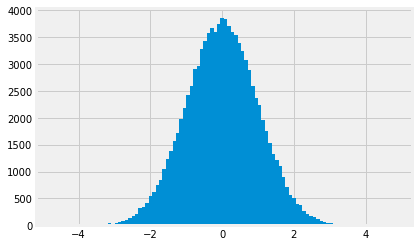

In [22]:
# Plot a histogram of several random normal samples from NumPy.
samples = np.random.randn(10000)
plt.hist(samples,100);

<a id="skewness"></a>
###  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](assets/images/skewness---mean-median-mode.jpg)

#### Plot a lognormal distribution generated with NumPy.

Take 1,000 samples using `np.random.lognormal(size=numsamples)` and plot them on a histogram.

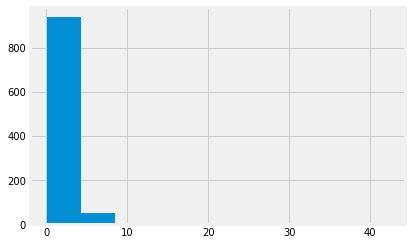

In [45]:
# Plot a lognormal distribution generated with NumPy
plt.hist(np.random.lognormal(size=1000),10);


#####  Real World Application - When mindfullness beats complexity
- Skewness is surprisingly important.
- Most algorithms implicitly use the mean by default when making approximations.
- If you know your data is heavily skewed, you may have to either transform your data or set your algorithms to work with the median.

<a id="kurtosis"></a>
### Kurtosis
- Kurtosis is a measure of whether the data are peaked or flat, relative to a normal distribution.
- Data sets with high kurtosis tend to have a distinct peak near the mean, decline rather rapidly, and have heavy tails. 

![kurtosis](assets/images/kurtosis.jpg)

[Wikipedia](https://en.wikipedia.org/wiki/Kurtosis) includes additional pictures and explanations that may best drive this concept home

####  Real-World Application: Risk Analysis
- Long-tailed distributions with high kurtosis elude intuition; we naturally think the event is too improbable to pay attention to.
- It's often the case that there is a large cost associated with a low-probability event, as is the case with hurricane damage.
- It's unlikely you will get hit by a Category 5 hurricane, but when you do, the damage will be catastrophic.
- Pay attention to what happens at the tails and whether this influences the problem at hand.
- In these cases, understanding the costs may be more important than understanding the risks.

<a id="determining-the-distribution-of-your-data"></a>
## Determining the Distribution of Your Data
---

**Objective:** Create basic data visualizations, including scatterplots, box plots, and histograms.

![](./assets/images/distributions.png)

#### Use the `.hist()` function of your Titantic DataFrame to plot histograms of all the variables in your data.

- The function `plt.hist(data)` calls the Matplotlib library directly.
- However, each DataFrame has its own `hist()` method that by default plots one histogram per column. 
- Given a DataFrame `my_df`, it can be called like this: `my_df.hist()`. 

In [52]:
# Plot all variables in the Titanic data set using histograms:
titanic.hist();

#### Use the built-in `.plot.box()` function of your Titanic DataFrame to plot box plots of your variables.

- Given a DataFrame, a box plot can be made where each column is one tick on the x axis.
- To do this, it can be called like this: `my_df.plot.box()`.
- Try using the keyword argument `showfliers`, e.g. `showfliers=False`.

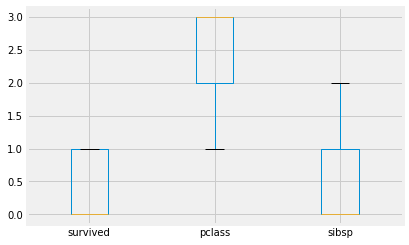

In [46]:
# Plotting all histograms can be unweildly; box plots can be more concise:
titanic[['survived', 'pclass','sibsp']].plot.box(showfliers=False);

<a id="exercise"></a>
### Exercise

1. Look at the Titanic data variables.
- Are any of them normal?
- Are any skewed?
- How might this affect our modeling?

In [2]:
# Work on your answers here!


![](./assets/images/visualization_flow_chart.jpg)

<a id="topic-review"></a>
## Lesson Review
---

- We covered several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- Describe bias and variance and why they are important.
- What are some important characteristics of distributions?

**Any further questions?**

<a id="lab-stats-dim"></a>
## Extra Lab: Using Stats for Feature Reduction
---

- In this section, we will apply four of the techniques from a PyData DC 2016 talk, ["A Practical Guide to Dimensionality Reduction"](https://pyvideo.org/pydata-dc-2016/a-practical-guide-to-dimensionality-reduction-techniques.html).

- Your solutions do not have to be fully automated!

In [ ]:
chicago_df = pd.read_csv('../datasets/chicago.csv')

chicago_df.head(2)

### 1. Percent missing values

The presenter suggests to drop features when > 95% of the values are missing.

#### 1a. For each column, what % are missing? 
- For this exercise, suppose only `np.nan` indicates missing.

In [ ]:
1. - chicago_df.count() / len(chicago_df)

#### 1b. For each column with missing values, create an indicator column that is `True` if missing and `False` otherwise. 

- Make the column name the original followed by `_Missing`. For example, `Address` would become `Address_Missing`.

In [ ]:
chicago_df['HouseType_Missing'] = chicago_df.HouseType.isnull()
chicago_df['Bath_Missing'] = chicago_df.Bath.isnull()

### 2. Amount of variation

#### 2a. What is the variance of each numeric column?

- Drop any columns that have zero variance. 
- Are there any non-numeric columns with zero variance?

In [ ]:
variances = chicago_df.std().sort_values(ascending=False)

variances

### 3. Pairwise correlation

#### 3a. Which pairs of features are highly correlated?
- For this exercise, use >= 0.65.
- Keep in mind -0.8 and 0.8 are both highly correlated.

In [ ]:
# Age/LotSizeSqft
# HouseSizeSqft/LotSizeSqft
chicago_df.corr().abs() > 0.65

#### 3b. For each pair, drop the feature that is less correlated with the target (Price)

In [ ]:
# Age/LotSizeSqft - 0.24/0.44
# HouseSizeSqft/LotSizeSqft - 0.46/0.44

print(chicago_df.corr().abs().loc['Price'])
chicago_df.drop(columns=['Age', 'LotSizeSqft'], inplace=True)

chicago_df

### 4. Correlation with the target

#### 4a. Which pairs of features are lowly correlated with MEDV?

- For this exercise, suppose < 0.25.

In [ ]:
target_corrs = chicago_df.corr().loc['Price']

target_corrs

#### 4b. Plot the (absolute values) of the correlations in descending order using a line plot. 

- Is there an "elbow" in the curve where the correlations flatten out or do not drop as steeply?

In [ ]:
target_corrs.abs().sort_values(ascending=False).plot(rot=45);